In [1]:
!pip install mftool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mftool: filename=mftool-2.9-py3-none-any.whl size=116883 sha256=7af59a267c4c72f41b6e24b8381e0100b3b28359e84003f3629be9f5f0a36040
  Stored in directory: /root/.cache/pip/wheels/84/85/ba/4c7c5174c8906c4a533dc05a906fa495f63cd8ee88423e7d03
Successfully built mftool


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mftool import Mftool

In [3]:
mf = Mftool()
result = mf.get_available_schemes('hdfc')
for scheme_code, scheme in result.items():
    print(scheme_code, scheme)

128628 HDFC Banking and PSU Debt Fund - Growth Option
128629 HDFC Banking and PSU Debt Fund - Growth Option - Direct Plan
128627 HDFC Banking and PSU Debt Fund - IDCW Option
128626 HDFC Banking and PSU Debt Fund - IDCW Option - Direct Plan
113070 HDFC Corporate Bond Fund - Growth Option
118987 HDFC Corporate Bond Fund - Growth Option - Direct Plan
132848 HDFC Corporate Bond Fund - IDCW Option
132849 HDFC Corporate Bond Fund - IDCW Option - Direct Plan
113071 HDFC Corporate Bond Fund - Quarterly IDCW Option
118986 HDFC Corporate Bond Fund - Quarterly IDCW Option - Direct Plan
128053 HDFC Credit Risk Debt Fund - Growth Option
128051 HDFC Credit Risk Debt Fund - Growth Option - Direct Plan
133148 HDFC Credit Risk Debt Fund - IDCW Option
133147 HDFC Credit Risk Debt Fund - IDCW Option - Direct Plan
128050 HDFC Credit Risk Debt Fund - Quarterly IDCW - Direct Plan
128052 HDFC Credit Risk Debt Fund - Quarterly IDCW Option
101872 HDFC Dynamic Debt Fund - Growth Option
119075 HDFC Dynamic Debt 

In [4]:
# mf = Mftool()
mutual_fund_code = '118989'
d1 = mf.get_scheme_quote(mutual_fund_code)
d2 = mf.get_scheme_details(mutual_fund_code)
{**d1, **d2}

{'scheme_code': 118989,
 'scheme_name': 'HDFC Mid-Cap Opportunities Fund - Growth Option - Direct Plan',
 'last_updated': '21-May-2025',
 'nav': '205.363',
 'fund_house': 'HDFC Mutual Fund',
 'scheme_type': 'Open Ended Schemes',
 'scheme_category': 'Equity Scheme - Mid Cap Fund',
 'scheme_start_date': {'date': '01-01-2013', 'nav': '18.79900'}}

,date,nav,dayChange
0,2013-01-01,18.799,NaN
1,2013-01-02,18.955,0.156
2,2013-01-03,18.973,0.018
3,2013-01-04,18.990,0.017
4,2013-01-07,19.039,0.049
...,...,...,...
3042,2025-05-15,203.713,1.110
3043,2025-05-16,205.197,1.484
3044,2025-05-19,205.708,0.511
3045,2025-05-20,203.771,-1.937


Text(0.5, 1.0, 'HDFC Mid-Cap Opportunities Fund - Growth Option - Direct Plan')

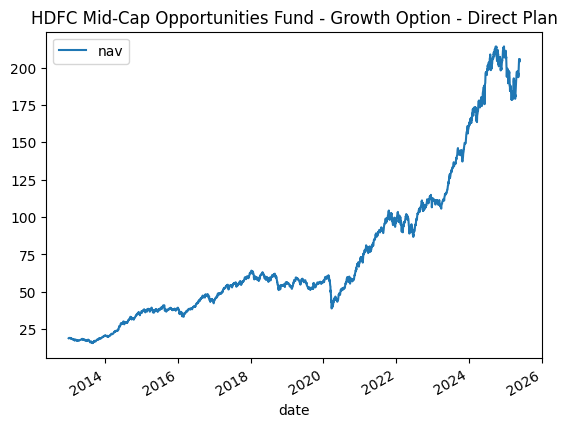

In [5]:
mutual_fund_code = '118989'
mutual_fund = 'HDFC Mid-Cap Opportunities Fund - Growth Option - Direct Plan'

df = mf.get_scheme_historical_nav(mutual_fund_code,as_Dataframe=True).reset_index()
df['nav'] = df['nav'].astype(float)
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df = df.sort_values('date').reset_index(drop=True)
display(df)
df.plot(x='date', y='nav')
plt.title(mutual_fund)

In [6]:
per_inc = df['dayChange']
print(per_inc.isna().sum())
per_inc.dropna()

df.iloc[1500]
# df
# per_inc.size

1


,1500
date,2019-02-06 00:00:00
nav,53.52
dayChange,-0.134


In [7]:
100000 / 77.7

1287 * (92 - 77)

19305

In [8]:
#Invest when momentum is significant
#Add the days for the allotments

Total_days = 3035
curr_day = 2800
pos_momentum = 0
neg_momentum = 0
price = 100000
invested = False

while curr_day < Total_days:

  if per_inc[curr_day] > 0:
    pos_momentum += 1
    if invested:
      price = price * (1 + per_inc[curr_day]/100)

    if neg_momentum >= 3:
      invested = True
      neg_momentum = 0


  else:
    neg_momentum += 1
    if invested:
      price = price * (1 + per_inc[curr_day]/100)

    if pos_momentum >= 4 and per_inc[curr_day] < -0.5: # &&
      invested = False
      pos_momentum = 0

  curr_day += 1

price

np.float64(126502.41668156094)

In [9]:
Total_days = 900
curr_day = 600
pos_momentum = 0
neg_momentum = 0
price = 100000
invested = False

while curr_day < Total_days:

  if per_inc[curr_day] > 0:
    pos_momentum += 1
    if invested:
      price = price * (1 + per_inc[curr_day]/100)

    if neg_momentum >= 3:
      invested = True
      ++curr_day
      neg_momentum = 0


  else:
    neg_momentum += 1
    if invested:
      price = price * (1 + per_inc[curr_day]/100)

    if pos_momentum >= 3 and (per_inc[curr_day] >= -0.2 or neg_momentum >= 2): # &&
      invested = False
      pos_momentum = 0

  curr_day += 1

price

np.float64(109373.90067608612)

In [10]:
Total_days = 3035
curr_day = 2800
pos_momentum = 0
neg_momentum = 0
price = 100000
invested = False

while curr_day < Total_days:

  if per_inc[curr_day] > 0:
    pos_momentum += 1
    neg_momentum = max(neg_momentum - 1, 0)
    # neg_momentum = neg_momentum - 1

  else:
    neg_momentum += 1
    pos_momentum = max(pos_momentum - 1, 0)

  if neg_momentum >= 2 and invested == True:
    pos_momentum = 0
    invested = False

  if pos_momentum >= 2 and invested == False:
    neg_momentum = 0
    invested = True


  if invested:
    price = price * (1 + per_inc[curr_day]/100)


  curr_day += 1

price

np.float64(213116.99112451263)

In [11]:
Total_days = 2800
curr_day = 2500
pos_momentum = 0
neg_momentum = 0
price = 100000
invested = False

while curr_day < Total_days:

  if per_inc[curr_day] > 0:
    pos_momentum += 1
    neg_momentum = max(neg_momentum - 1, 0)
    # neg_momentum = neg_momentum - 1

  else:
    neg_momentum += 1
    pos_momentum = max(pos_momentum - 1, 0)

  if neg_momentum >= 2 and invested == True:
    pos_momentum = 0
    invested = False

  if pos_momentum >= 2 and invested == False:
    neg_momentum = 0
    invested = True


  if invested:
    price = price * (1 + per_inc[curr_day]/100)


  curr_day += 1

price

np.float64(278788.3134503835)

In [12]:
Total_days = 900
curr_day = 600
pos_momentum = 0
neg_momentum = 0
price = 100000
invested = False

while curr_day < Total_days:

  if per_inc[curr_day] > 0:
    pos_momentum += 1
    neg_momentum = max(neg_momentum - 1, 0)
    # neg_momentum = neg_momentum - 1

  else:
    neg_momentum += 1
    pos_momentum = max(pos_momentum - 1, 0)

  if neg_momentum >= 2 and invested == True:
    pos_momentum = 0
    invested = False

  if pos_momentum >= 2 and invested == False:
    neg_momentum = 0
    invested = True


  if invested:
    price = price * (1 + per_inc[curr_day]/100)


  curr_day += 1

price

np.float64(126414.8426391249)

In [13]:
Total_days = 2000
curr_day = 600
pos_momentum = 0
neg_momentum = 0
price = 100000
invested = False

while curr_day < Total_days:

  if per_inc[curr_day] > 0:
    pos_momentum += 1
    neg_momentum = max(neg_momentum - 1, 0)
    # neg_momentum = neg_momentum - 1

  else:
    neg_momentum += 1
    pos_momentum = max(pos_momentum - 1, 0)

  if neg_momentum >= 2 and invested == True:
    pos_momentum = 0
    invested = False

  if pos_momentum >= 2 and invested == False:
    neg_momentum = 0
    invested = True


  if invested:
    price = price * (1 + per_inc[curr_day]/100)


  curr_day += 1

price

np.float64(383793.97071280004)

In [14]:
import plotly.graph_objs as go
import plotly.express as px

mutual_fund_code = '119598'
mutual_fund = 'SBI Bluechip Fund - Direct Plan - Growth'

# Load and prepare the data
df2 = mf.get_scheme_historical_nav(mutual_fund_code, as_Dataframe=True).reset_index()
df2['nav'] = df2['nav'].astype(float)
df2['date'] = pd.to_datetime(df2['date'], format='%d-%m-%Y')
df2 = df2.sort_values('date').reset_index(drop=True)

# Create an interactive plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=df2['date'], y=df2['nav'], mode='lines', name='NAV'))

fig.update_layout(
    title=mutual_fund,
    xaxis_title='Date',
    yaxis_title='NAV',
    hovermode='x',
    template='plotly_white'
)

fig.show()

In [15]:
per_inc2 = df2['dayChange']
print(per_inc2.isna().sum())
per_inc.dropna()


df2.iloc[1800]

1


,1800
date,2020-05-06 00:00:00
nav,34.2533
dayChange,0.3037


In [16]:
Total_days = 2550
curr_day = 1800
pos_momentum = 0
neg_momentum = 0
price = 100000
invested = False

count_pos = 0
count_neg = 0
count_all_pos = 0
count_all_neg = 0
steady_price = 100000

while curr_day < Total_days:



  steady_price = steady_price * (1 + per_inc2[curr_day]/100)

  if per_inc2[curr_day] > 0:

    count_all_pos += 1
    pos_momentum += 1
    neg_momentum = max(neg_momentum - 1, 0)
    # neg_momentum = neg_momentum - 1

  else:

    count_all_neg += 1
    neg_momentum += 1
    pos_momentum = max(pos_momentum - 1, 0)

  if neg_momentum >= 2 and invested == True:
    pos_momentum = 0
    invested = False

  if pos_momentum >= 2 and invested == False:
    neg_momentum = 0
    invested = True


  if invested:
    if per_inc2[curr_day] < 0:
      count_neg += 1
    else:
      count_pos += 1

    price = price * (1 + per_inc2[curr_day]/100)


  curr_day += 1

print(price)
print(steady_price)

print(count_pos, count_neg)

print(count_all_pos, count_all_neg)


235321.20842984694
145126.70725630334
337 125
432 318


In [17]:
mutual_fund_code = '120503'
mutual_fund = 'Nippon India Small Cap Fund - Direct Plan - Growth'

# Load and prepare the data
df3 = mf.get_scheme_historical_nav(mutual_fund_code, as_Dataframe=True).reset_index()
df3['nav'] = df3['nav'].astype(float)
df3['date'] = pd.to_datetime(df3['date'], format='%d-%m-%Y')
df3 = df3.sort_values('date').reset_index(drop=True)

# Create an interactive plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=df3['date'], y=df3['nav'], mode='lines', name='NAV'))

fig.update_layout(
    title=mutual_fund,
    xaxis_title='Date',
    yaxis_title='NAV',
    hovermode='x',
    template='plotly_white'
)

fig.show()

In [108]:
mutual_fund_code = '113071'
mutual_fund = 'Nippon India Small Cap Fund - Direct Plan - Growth'

# Load and prepare the data
df4 = mf.get_scheme_historical_nav(mutual_fund_code, as_Dataframe=True).reset_index()
df4['nav'] = df4['nav'].astype(float)
df4['date'] = pd.to_datetime(df4['date'], format='%d-%m-%Y')
df4 = df4.sort_values('date').reset_index(drop=True)

# Create an interactive plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=df4['date'], y=df4['nav'], mode='lines', name='NAV'))

fig.update_layout(
    title=mutual_fund,
    xaxis_title='Date',
    yaxis_title='NAV',
    hovermode='x',
    template='plotly_white'
)

fig.show()

In [110]:
mutual_fund_code = '118986'
mutual_fund = 'Nippon India Small Cap Fund - Direct Plan - Growth'

# Load and prepare the data
df5 = mf.get_scheme_historical_nav(mutual_fund_code, as_Dataframe=True).reset_index()
df5['nav'] = df5['nav'].astype(float)
df5['date'] = pd.to_datetime(df5['date'], format='%d-%m-%Y')
df5 = df5.sort_values('date').reset_index(drop=True)

# Create an interactive plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=df5['date'], y=df5['nav'], mode='lines', name='NAV'))

fig.update_layout(
    title=mutual_fund,
    xaxis_title='Date',
    yaxis_title='NAV',
    hovermode='x',
    template='plotly_white'
)

fig.show()

In [18]:
per_inc3 = df3['dayChange']
print(per_inc3.isna().sum())
per_inc3.dropna()

per_inc3.size
df3.iloc[900]

1


,900
date,2016-08-31 00:00:00
nav,34.8669
dayChange,0.1409


In [19]:
# Total_days = 3041
# curr_day = 2900

# Total_days = 900
# curr_day = 1

Total_days = 2900
curr_day = 900
pos_momentum = 0
neg_momentum = 0
price = 100000
invested = False

count_pos = 0
count_neg = 0
count_all_pos = 0
count_all_neg = 0
steady_price = 100000

while curr_day < Total_days:



  steady_price = steady_price * (1 + per_inc3[curr_day]/100)

  if per_inc3[curr_day] > 0:

    count_all_pos += 1
    pos_momentum += 1
    neg_momentum = max(neg_momentum - 1, 0)

  else:

    count_all_neg += 1
    neg_momentum += 1
    pos_momentum = max(pos_momentum - 1, 0)

  if neg_momentum >= 2 and invested == True:
    pos_momentum = 0
    invested = False

  if pos_momentum >= 1 and invested == False:
    neg_momentum = 0
    invested = True


  if invested:
    if per_inc3[curr_day] < 0:
      count_neg += 1
    else:
      count_pos += 1

    price = price * (1 + per_inc3[curr_day]/100)


  curr_day += 1

print(price)
print(steady_price)

print(count_pos, count_neg)

print(count_all_pos, count_all_neg)

1781146.0058609487
204956.7613902724
1111 447
1111 889


In [20]:
Total_days = 2900
curr_day = 900
pos_momentum = 0
neg_momentum = 0
price = 100000
invested = False

count_pos = 0
count_neg = 0
count_all_pos = 0
count_all_neg = 0
steady_price = 100000

while curr_day < Total_days:





  steady_price = steady_price * (1 + per_inc3[curr_day]/100)

  if per_inc3[curr_day] > 0:

    count_all_pos += 1
    pos_momentum += 1
    neg_momentum = max(neg_momentum - 1, 0)

  else:

    count_all_neg += 1
    neg_momentum += 1
    pos_momentum = max(pos_momentum - 1, 0)

  if neg_momentum >= 3 and invested == True:
    pos_momentum = 0
    invested = False
    price = price * (1 + per_inc3[curr_day]/100)
    count_neg += 1

  if pos_momentum >= 1 and invested == False:
    neg_momentum = 0
    invested = True
    curr_day += 1
    continue



  if invested:
    if per_inc3[curr_day] < 0:
      count_neg += 1
    else:
      count_pos += 1

    price = price * (1 + per_inc3[curr_day]/100)



  curr_day += 1

print(price)
print(steady_price)

print(count_pos, count_neg)

print(count_all_pos, count_all_neg)

281915.7382539964
204956.7613902724
995 738
1111 889


In [21]:
Total_days = 2000
curr_day = 900
pos_momentum = 0
neg_momentum = 0
price = 100000
invested = False

count_pos = 0
count_neg = 0
count_all_pos = 0
count_all_neg = 0
steady_price = 100000

# Pending buy/sell signal queue
buy_delay = None  # day the buy should be executed
sell_delay = None  # day the sell should be executed

while curr_day < Total_days:

    # Update momentum
    if per_inc3[curr_day] > 0:
        count_all_pos += 1
        pos_momentum += 1
        neg_momentum = max(neg_momentum - 1, 0)
    else:
        count_all_neg += 1
        neg_momentum += 1
        pos_momentum = max(pos_momentum - 1, 0)

    # Check if delayed buy/sell action should happen today
    if buy_delay == curr_day:
        invested = True
        buy_delay = None
        neg_momentum = 0  # Reset neg momentum on entry

    if sell_delay == curr_day:
        invested = False
        sell_delay = None
        pos_momentum = 0  # Reset pos momentum on exit

    # Schedule delayed action
    if neg_momentum >= 2 and invested and sell_delay is None:
        sell_delay = curr_day + 1

    elif pos_momentum >= 2 and not invested and buy_delay is None:
        buy_delay = curr_day + 1

    # Update price values
    steady_price *= (1 + per_inc3[curr_day] / 100)

    if invested:
        price *= (1 + per_inc3[curr_day] / 100)
        if per_inc3[curr_day] < 0:
            count_neg += 1
        else:
            count_pos += 1

    curr_day += 1

price

np.float64(143554.10327152687)

#Algo 2

In [124]:

# Generate all binary combinations of length 5
from itertools import product

binary_arrays = [tuple(p) for p in product([0, 1], repeat=7)]

sell_dict = {}
buy_dict = {}

for arr in binary_arrays:
    sell_dict[arr] = 0
    buy_dict[arr] = 0



In [125]:
def sign(x):
    return 1 if x > 0 else 0

def process_data(data):
    n = len(data)
    for i in range(n - 11):  # we need at least i+7 < n to access i:i+5 and i+5:i+8
        five_window = data[i:i+7]
        next_three = data[i+8:i+10]

        # Convert five_window to binary (1 for positive, 0 for negative or zero)
        binary_key = tuple([sign(x) for x in five_window])

        # Count positive8s and negatives in next_three
        pos_count = sum(1 for x in next_three if x > 0)
        neg_count = sum(1 for x in next_three if x < 0)

        if pos_count >= 2:
            buy_dict[binary_key] += 1
        elif neg_count >= 2:
            sell_dict[binary_key] += 1

# Example usage
# data = [1, -2, 3, 4, -1, 2, 3, -5, -4, -6, 5, 1, -1, 2, -2]
# process_data(data)

# # Print some results
# print("Buy dict (non-zero entries):")
# for k, v in buy_dict.items():
#     if v > 0:
#         print(k, v)

# print("\nSell dict (non-zero entries):")
# for k, v in sell_dict.items():
#     if v > 0:
#         print(k, v)

per_inc4 = df4['dayChange']
per_inc4.dropna()
per_inc5 = df5['dayChange']
per_inc5.dropna()


,dayChange
1,0.0065
2,0.0077
3,0.0088
4,0.0046
5,0.0053
...,...
2984,0.0118
2985,0.0160
2986,0.0103
2987,0.0104


In [126]:
full_data = per_inc + per_inc2 + per_inc3 + per_inc4 + per_inc5
process_data(full_data)
i = 1
print("Buy dict (non-zero entries):")
for k, v in buy_dict.items():
    if v > 0:
        print(i)
        print(k, v)

    i += 1


i = 1
print("\nSell dict (non-zero entries):")
for k, v in sell_dict.items():
    if v > 0:
        print(i)
        print(k, v)

    i += 1

Buy dict (non-zero entries):
1
(0, 0, 0, 0, 0, 0, 0) 23
2
(0, 0, 0, 0, 0, 0, 1) 21
3
(0, 0, 0, 0, 0, 1, 0) 6
4
(0, 0, 0, 0, 0, 1, 1) 25
5
(0, 0, 0, 0, 1, 0, 0) 4
6
(0, 0, 0, 0, 1, 0, 1) 6
7
(0, 0, 0, 0, 1, 1, 0) 7
8
(0, 0, 0, 0, 1, 1, 1) 28
9
(0, 0, 0, 1, 0, 0, 0) 8
10
(0, 0, 0, 1, 0, 0, 1) 2
12
(0, 0, 0, 1, 0, 1, 1) 6
13
(0, 0, 0, 1, 1, 0, 0) 6
14
(0, 0, 0, 1, 1, 0, 1) 8
15
(0, 0, 0, 1, 1, 1, 0) 10
16
(0, 0, 0, 1, 1, 1, 1) 30
17
(0, 0, 1, 0, 0, 0, 0) 9
18
(0, 0, 1, 0, 0, 0, 1) 9
19
(0, 0, 1, 0, 0, 1, 0) 1
20
(0, 0, 1, 0, 0, 1, 1) 4
21
(0, 0, 1, 0, 1, 0, 0) 1
23
(0, 0, 1, 0, 1, 1, 0) 1
24
(0, 0, 1, 0, 1, 1, 1) 7
25
(0, 0, 1, 1, 0, 0, 0) 7
26
(0, 0, 1, 1, 0, 0, 1) 7
27
(0, 0, 1, 1, 0, 1, 0) 3
28
(0, 0, 1, 1, 0, 1, 1) 12
29
(0, 0, 1, 1, 1, 0, 0) 12
30
(0, 0, 1, 1, 1, 0, 1) 8
31
(0, 0, 1, 1, 1, 1, 0) 12
32
(0, 0, 1, 1, 1, 1, 1) 38
33
(0, 1, 0, 0, 0, 0, 0) 5
34
(0, 1, 0, 0, 0, 0, 1) 5
36
(0, 1, 0, 0, 0, 1, 1) 11
37
(0, 1, 0, 0, 1, 0, 0) 3
38
(0, 1, 0, 0, 1, 0, 1) 1
39
(0, 1, 0, 0, 1, 1, 0)

In [127]:
def compute_probabilities():
    probabilities = {}
    for key in binary_arrays:
        total = buy_dict[key] + sell_dict[key]
        if total == 0:
            probabilities[key] = 0.5  # neutral if no data
        else:
            probabilities[key] = buy_dict[key] / total
    return probabilities

In [131]:
import random

def simulate_strategy(data, probabilities, initial_amount=100000):
    n = len(data)
    invested = False
    amount = initial_amount
    naive_amount = initial_amount  # Track naive strategy
    decisions = []

    i = 0
    while i < n - 7:
        five_window = data[i:i+7]
        binary_key = tuple([1 if x > 0 else 0 for x in five_window])

        p_invest = probabilities.get(binary_key, 0.5)
        trial_result = random.random() < p_invest  # Bernoulli trial

        # Naive strategy: always apply percentage change
        naive_amount *= (1 + data[i+7] / 100)

        if invested:
            # Apply percentage changes for invested strategy
            amount *= (1 + data[i+7] / 100)
            if trial_result:
                decisions.append(("Stay Invested", binary_key, amount))
            else:
                invested = False
                decisions.append(("Sell", binary_key, amount))
        else:
            if trial_result:
                invested = True
                # amount *= (1 + data[i+5] / 100)
                decisions.append(("Buy", binary_key, amount))
            else:
                decisions.append(("Do Nothing", binary_key, amount))

        i += 1

    return amount, naive_amount, decisions

In [158]:
data1 = per_inc[1500:2500].reset_index(drop=True)

In [162]:
sell_dict1 = {}
buy_dict1 = {}

for arr in binary_arrays:
    sell_dict1[arr] = 0

    buy_dict1[arr] = 0

process_data(data1)

data1[0]
probs = compute_probabilities()

final_amount1, naive_amount, decisions1 = simulate_strategy(data1, probs)

In [163]:
final_amount1

np.float64(169347.68757882906)

In [164]:
naive_amount

np.float64(169370.55542799557)